In [2]:
import matplotlib.pyplot as plt
from main import *
import numpy as np
import random as rn
import math as m
from time import perf_counter as pc

                  Neural Net Characteristics:                   
1. Layer Sizes = [1, 20, 20, 20, 1]
2. Weight Medians = [0.11, 0.02, 0.0, 0.04]
3. Number of Parameters: 840
4. Activation Functions: ['ATAN', 'ELU', 'ATAN', 'NONE']
R2: 0.890429 | Training: ========================================


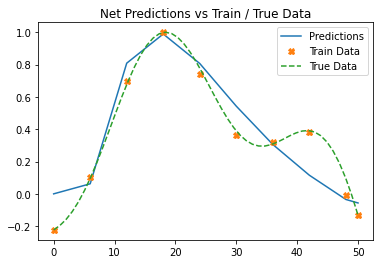

In [3]:
## Feature Functions ##


## Training Tests ##

# Setup net
NN = AdvNet(1, [20]*3, 1, ["ATAN", "ELU", "ATAN", "NONE"])
print(NN)

# Make X and Y data
xArr = np.linspace(0, 11)

yT = [m.sin(i + 4) - i**2/10 + i for i in xArr]
yArr = np.array(yT)
yArr = yArr / np.max(yArr)

# Thin data
xThin, yThin, xPlot = thinData(xArr, yArr, 10)

# Train net
NN, R2 = genTrain(NN, xThin, yThin, batchSize=50, iterations=420)

# Net Predictions
yHatThin = Forecast(NN, xThin, plotResults=False)

# Plot predictions and such
plt.plot(xPlot, yHatThin)
plt.plot(xPlot, yThin, 'X')
plt.plot(xArr*50/11, yArr, '--')
plt.legend(["Predictions", "Train Data", "True Data"])
plt.title("Net Predictions vs Train / True Data")
plt.show()

In [3]:
from time import perf_counter as pc

# Rscores0  = []
# Rscores10 = []
# Rscores20 = []
# Rscores50 = []

# numIterations = 2
# quiet = False

# # Default
# t1 = pc()
# for i in range(numIterations):
#     NN = AdvNet(1, [10], 1, "ATAN")
#     dump, R2 = genTrain(NN, xThin, yThin, Silent=quiet)
#     # Rscores0.append(R2)

# # Default
# t2 = pc()
# for i in range(numIterations):
#     NN = AdvNet(1, [10], 1, "ATAN")
#     dump, R2 = genTrain(NN, xThin, yThin, batchSize=10, Silent=quiet)
#     # Rscores10.append(R2)

# # Default
# t3 = pc()
# for i in range(numIterations):
#     NN = AdvNet(1, [10], 1, "ATAN")
#     dump, R2 = genTrain(NN, xThin, yThin, batchSize=20, Silent=quiet)
#     # Rscores20.append(R2)

# # Default
# t4 = pc()
# for i in range(numIterations):
#     NN = AdvNet(1, [10], 1, "ATAN")
#     dump, R2 = genTrain(NN, xThin, yThin, batchSize=50, Silent=quiet)
#     # Rscores50.append(R2)

# t5 = pc()

# Results
# print()
# print("R^2 Data Per Batch Size:")
# print(f"Default Method: Avg = {np.average(Rscores0):.6f}, Med = {np.median(Rscores0):.6f}")
# print(f"10 Batch Size: Avg = {np.average(Rscores10):.6f}, Med = {np.median(Rscores10):.6f}")
# print(f"20 Batch Size: Avg = {np.average(Rscores20):.6f}, Med = {np.median(Rscores20):.6f}")
# print(f"50 Batch Size: Avg = {np.average(Rscores50):.6f}, Med = {np.median(Rscores50):.6f}")

# print()
# print(f"T1 = {t2-t1}")
# print(f"T2 = {t3-t2}")
# print(f"T3 = {t4-t3}")
# print(f"T4 = {t5-t4}")

results = """

Accuracies (50 iterations):
Default0 Size: Avg = 0.787037, Med = 0.786065
10 Batch Size: Avg = 0.780430, Med = 0.776033
20 Batch Size: Avg = 0.799839, Med = 0.790577
50 Batch Size: Avg = 0.837653, Med = 0.854896

Time to Complete (2 iterations)
T1 = 5.297518100000161   / 2
T2 = 3.714165800000046   / 2
T3 = 7.308545600000798   / 2
T4 = 18.205850700000155  / 2

Results:
- The default method (exponential decay from 20 to 10 depth) is about
  right in the middle of the 10 and 20 fixed depths (no suprise). It
  might actually be a bit better in accuracy and time (do more iterations
  for the time case to check) though so definitely will keep as the default.
- Might be useful for being able to change the starting value of the depth
  if using the exponential decay style.
"""